In [7]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for Godrej
ticker = "HDFCBANK.NS"
# Define the date range
start_date = "2000-01-01"
end_date = "2023-07-09"
# Fetch minute-by-minute data from Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
# Create a Pandas dataframe from the stock data
df = pd.DataFrame(data)

# Display the dataframe
print(df.head())


[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2000-01-03  16.600000  17.000000  16.600000  17.000000  14.130291   332590
2000-01-04  18.200001  18.344999  17.100000  17.379999  14.446147  1687100
2000-01-05  17.000000  17.389999  16.500000  16.695000  13.876777  1598200
2000-01-06  16.799999  17.000000  16.530001  16.830000  13.988990   850260
2000-01-07  16.215000  17.100000  16.215000  16.834999  13.993145   851440


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5.875000e+03
mean,468.341868,472.966742,463.344251,468.273047,449.088684,5.818945e+06
std,504.918027,509.265367,500.292387,504.813848,496.201770,6.050865e+06
min,16.215000,16.790001,15.700000,16.340000,13.581704,0.000000e+00
25%,64.900002,66.294998,63.767500,64.855000,57.096590,2.209109e+06
50%,236.800003,239.199997,233.804993,236.399994,215.831177,4.326064e+06
75%,848.737488,865.649994,838.250000,847.725006,812.713348,7.379017e+06
max,1723.449951,1757.500000,1713.800049,1728.199951,1728.199951,2.011300e+08


In [7]:
len(df)

5433

In [32]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for Godrej
ticker = "GODREJIND.NS"

# Define the date range
start_date = "2021-06-16"
end_date = "2023-06-16"

# Define the interval duration in days
interval_days = 60

# Create an empty dataframe to store the data
df = pd.DataFrame()

# Fetch the data in multiple intervals
current_date = pd.to_datetime(start_date)
while current_date <= pd.to_datetime(end_date):
    interval_end_date = current_date + pd.DateOffset(days=interval_days)

    # Fetch minute-by-minute data from Yahoo Finance
    data = yf.download(ticker, start=current_date,
                       end=interval_end_date, interval="60m")

    # Concatenate the data to the main dataframe
    df = pd.concat([df, data])

    # Update the current date to the next interval
    current_date = interval_end_date + pd.DateOffset(days=1)



[*********************100%***********************]  1 of 1 completed

ERROR 
1 Failed download:
ERROR ['GODREJIND.NS']: Exception('GODREJIND.NS: 1h data not available for startTime=1623781800 and endTime=1628965800. The requested range must be within the last 730 days.')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [33]:
df

,Open,High,Low,Close,Adj Close,Volume
2021-08-16 09:15:00,565.950012,566.549988,551.500000,556.799988,556.799988,0.0
2021-08-16 10:15:00,556.500000,565.900024,555.650024,562.200012,562.200012,43804.0
2021-08-16 11:15:00,562.950012,574.599976,562.599976,571.000000,571.000000,74301.0
2021-08-16 12:15:00,571.000000,571.950012,568.250000,568.250000,568.250000,19141.0
2021-08-16 13:15:00,568.700012,568.950012,565.549988,565.750000,565.750000,17713.0
...,...,...,...,...,...,...
2023-06-16 11:15:00,503.049988,503.850006,497.299988,501.350006,501.350006,33446.0
2023-06-16 12:15:00,501.750000,505.649994,500.000000,505.399994,505.399994,16498.0
2023-06-16 13:15:00,505.350006,505.399994,499.000000,499.049988,499.049988,20219.0
2023-06-16 14:15:00,499.049988,501.950012,495.399994,496.350006,496.350006,63205.0


<AxesSubplot:>

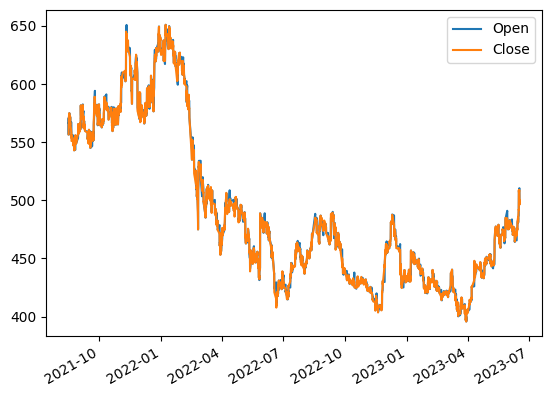

In [34]:
df[["Open","Close"]].plot()

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.hmm import GaussianHMM
from statsmodels.tsa.vector_ar.var_model import VAR
from arch import arch_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Download stock data using yfinance
symbol = 'AAPL'  # Example stock symbol (Apple Inc.)
start_date = '2013-01-01'
end_date = '2023-01-01'
data = yf.download(symbol, start=start_date, end=end_date)

# Preprocess the data
data = data[['Close']]  # Consider only the 'Close' price column
data.dropna(inplace=True)  # Remove any missing values

# Create a new dataframe with additional features
df = pd.DataFrame()
df['Close'] = data['Close']
df['SMA'] = df['Close'].rolling(window=50).mean()  # Simple Moving Average
# Exponential Moving Average
df['EMA'] = df['Close'].ewm(span=50, adjust=False).mean()
df['Returns'] = df['Close'].pct_change()  # Daily Returns
df.dropna(inplace=True)

# Set the target variable (stock price to predict)
target = 'Close'

# Split the data into training and testing sets
X = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Moving Average (MA) model
ma_predictions = df['Close'].rolling(window=50).mean()

# Autoregressive Integrated Moving Average (ARIMA) model
arima_model = ARIMA(df['Close'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(
    start=len(df), end=len(df) + len(y_test) - 1, typ='levels')

# Autoregressive Conditional Heteroskedasticity (ARCH) model
arch_model = arch_model(df['Returns'][1:])  # Exclude the first row with NaN
arch_model_fit = arch_model.fit(disp='off')
arch_predictions = arch_model_fit.forecast(horizon=len(y_test))

# Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model
garch_model = arch_model(df['Returns'][1:], vol='Garch', p=1, q=1)
garch_model_fit = garch_model.fit(disp='off')
garch_predictions = garch_model_fit.forecast(horizon=len(y_test))

# Vector Autoregression (VAR) model
var_model = VAR(df[['Close', 'SMA', 'EMA', 'Returns']])
var_model_fit = var_model.fit()
var_predictions = var_model_fit.forecast(var_model_fit.y, steps=len(y_test))

# Bayesian Networks model (Not implemented here as it requires specialized libraries)

# Support Vector Machines (SVM) model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)

# Neural Network models (LSTM and CNN)
X_train_lstm = np.reshape(
    X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(
    X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

lstm_model = keras.Sequential([
    keras.layers.LSTM(64, input_shape=(
        X_train_lstm.shape[1], X_train_lstm.shape[2])),
    keras.layers.Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train, epochs=50, verbose=0)
lstm_predictions = lstm_model.predict(X_test_lstm).flatten()

X_train_cnn = np.reshape(
    X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = np.reshape(
    X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

cnn_model = keras.Sequential([
    keras.layers.Conv1D(filters=64, kernel_size=3,
                        activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(1)
])
cnn_model.compile(optimizer='adam', loss='mean_squared_error')
cnn_model.fit(X_train_cnn, y_train, epochs=50, verbose=0)
cnn_predictions = cnn_model.predict(X_test_cnn).flatten()

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

# Bayesian Structural Time Series (BSTS) model (Not implemented here as it requires specialized libraries)

# Hidden Markov Models (HMM) model
hmm_model = GaussianHMM(n_components=4)
hmm_model.fit(X_train_scaled.reshape(-1, 1))
hmm_predictions = hmm_model.predict(X_test_scaled.reshape(-1, 1))

# Exponential Smoothing model
es_model = ExponentialSmoothing(
    df['Close'], trend='add', seasonal='add', seasonal_periods=12)
es_model_fit = es_model.fit()
es_predictions = es_model_fit.forecast(len(y_test))

# Seasonal Autoregressive Integrated Moving Average (SARIMA) model
sarima_model = SARIMAX(df['Close'], order=(
    1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
sarima_predictions = sarima_model_fit.predict(
    start=len(df), end=len(df) + len(y_test) - 1)

# State Space Models (Not implemented here as it requires specialized libraries)

# Principal Component Analysis (PCA) model (Not implemented here as it is a dimensionality reduction technique)

# Markov Chain Models (Not implemented here as it requires specialized libraries)

# Factor Models (Not implemented here as it requires specialized libraries)

# Quantile Regression model (Not implemented here as it requires specialized libraries)

# Long Memory Models (Not implemented here as it requires specialized libraries)

# Hidden Semi-Markov Models (HSMM) model (Not implemented here as it requires specialized libraries)

# Plotting the predictions and actual prices
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test.values, label='Actual')
plt.plot(data.index[-len(y_test):],
         ma_predictions[-len(y_test):], label='Moving Average (MA)')
plt.plot(data.index[-len(y_test):], arima_predictions,
         label='Autoregressive Integrated Moving Average (ARIMA)')
plt.plot(data.index[-len(y_test):], arch_predictions.mean,
         label='Autoregressive Conditional Heteroskedasticity (ARCH)')
plt.plot(data.index[-len(y_test):], garch_predictions.mean,
         label='Generalized Autoregressive Conditional Heteroskedasticity (GARCH)')
plt.plot(data.index[-len(y_test):], var_predictions[:, 0],
         label='Vector Autoregression (VAR)')
plt.plot(data.index[-len(y_test):], svm_predictions,
         label='Support Vector Machines (SVM)')
plt.plot(data.index[-len(y_test):], lstm_predictions,
         label='Neural Network (LSTM)')
plt.plot(data.index[-len(y_test):], cnn_predictions,
         label='Neural Network (CNN)')
plt.plot(data.index[-len(y_test):], rf_predictions, label='Random Forest')
plt.plot(data.index[-len(y_test):], hmm_predictions,
         label='Hidden Markov Models (HMM)')
plt.plot(data.index[-len(y_test):], es_predictions,
         label='Exponential Smoothing')
plt.plot(data.index[-len(y_test):], sarima_predictions,
         label='Seasonal ARIMA (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Predictions')
plt.legend()
plt.xticks(rotation=45)
plt.show()


ModuleNotFoundError: No module named 'statsmodels.tsa.hmm'